# Import Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [72]:
df_test=pd.read_csv('aug_test.csv')
df_train=pd.read_csv('aug_train.csv')

# Viewing data

In [73]:
df_train.head(15)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [74]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [75]:
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# Removing Unwanted Data

In [76]:
train=df_train.drop('enrollee_id', axis=1)
test=df_test.drop('enrollee_id', axis=1)

# Handle Missing Values

In [77]:
categorical_cols = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

In [78]:
# for col in categorical_cols:
#     train[col].fillna("Unknown", inplace=True)
#     test[col].fillna("Unknown", inplace=True)

# Cleaning the data

In [79]:
def clean_experience(val):
    if val == '<1':
        return 0
    elif val == '>20':
        return 21
    try:
        return int(val)
    except:
        return np.nan

In [80]:
train['experience'] = train['experience'].apply(clean_experience)
test['experience'] = test['experience'].apply(clean_experience)

In [81]:
def clean_last_new_job(val):
    if val == '>4':
        return 5
    elif val == 'never':
        return 0
    try:
        return int(val)
    except:
        return np.nan

In [82]:
train['last_new_job'] = train['last_new_job'].apply(clean_last_new_job)
test['last_new_job'] = test['last_new_job'].apply(clean_last_new_job)

In [83]:
train['experience'].fillna(train['experience'].median(), inplace=True)
train['last_new_job'].fillna(train['last_new_job'].median(), inplace=True)
test['experience'].fillna(test['experience'].median(), inplace=True)
test['last_new_job'].fillna(test['last_new_job'].median(), inplace=True)

In [84]:
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,0.0,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [85]:
train.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [86]:
test.isnull().sum()

city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  0
company_size              622
company_type              634
last_new_job                0
training_hours              0
dtype: int64

# Manual Encoding

In [87]:
def encode_relevent_experience(value):
    if value == 'Has relevent experience':
        return 1
    else:
        return 0

In [88]:
def encode_enrolled_university(value):
    if value == 'no_enrollment':
        return 1
    elif value == 'Full time course':
        return 2
    elif value == 'Part time course':
        return 3
    else:
        return 0

In [89]:
def encode_major_discipline(value):
    if value == 'STEM':
        return 1
    elif value == 'Business Degree':
        return 2
    elif value == 'Arts':
        return 3
    elif value == 'Humanities':
        return 4
    elif value == 'No Major':
        return 5
    elif value == 'Other':
        return 6
    else:
        return 0

In [90]:
def encode_company_size(value):
    if value == '<10':
        return 1
    elif value == '10/49':
        return 2
    elif value == '50-99':
        return 3
    elif value == '100-500':
        return 4
    elif value == '500-999':
        return 5
    elif value == '1000-4999':
        return 6
    elif value == '5000-9999':
        return 7
    elif value == '10000+':
        return 8
    else:
        return 0

In [91]:
def encode_company_type(value):
    if value == 'Pvt Ltd':
        return 1
    elif value == 'Funded Startup':
        return 2
    elif value == 'Public Sector':
        return 3
    elif value == 'NGO':
        return 4
    elif value == 'Early Stage Startup':
        return 5
    elif value == 'Other':
        return 6
    else:
        return 0

In [92]:
def encode_education_level(val):
    if val == 'Primary School':
        return 1
    elif val == 'High School':
        return 2
    elif val == 'Graduate':
        return 3
    elif val == 'Masters':
        return 4
    elif val == 'Phd':
        return 5
    else:
        return 0

In [93]:
train['relevent_experience'] = train['relevent_experience'].apply(encode_relevent_experience)
train['enrolled_university'] = train['enrolled_university'].apply(encode_enrolled_university)
train['major_discipline'] = train['major_discipline'].apply(encode_major_discipline)
train['company_size'] = train['company_size'].apply(encode_company_size)
train['company_type'] = train['company_type'].apply(encode_company_type)
train['education_level'] = train['education_level'].apply(encode_education_level)

In [94]:
test['relevent_experience'] = test['relevent_experience'].apply(encode_relevent_experience)
test['enrolled_university'] = test['enrolled_university'].apply(encode_enrolled_university)
test['major_discipline'] = test['major_discipline'].apply(encode_major_discipline)
test['company_size'] = test['company_size'].apply(encode_company_size)
test['company_type'] = test['company_type'].apply(encode_company_type)
test['education_level'] = test['education_level'].apply(encode_education_level)

# Visualizations

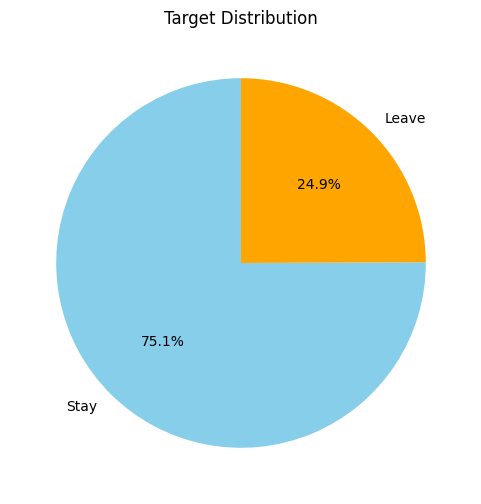

In [95]:
plt.figure(figsize=(6, 6))
train['target'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Stay', 'Leave'],
    colors=['skyblue', 'orange'],
    startangle=90
)
plt.title("Target Distribution")
plt.ylabel('')
plt.show()

In [96]:
df= train.drop('city', axis=1)
df= df.drop('gender', axis=1)

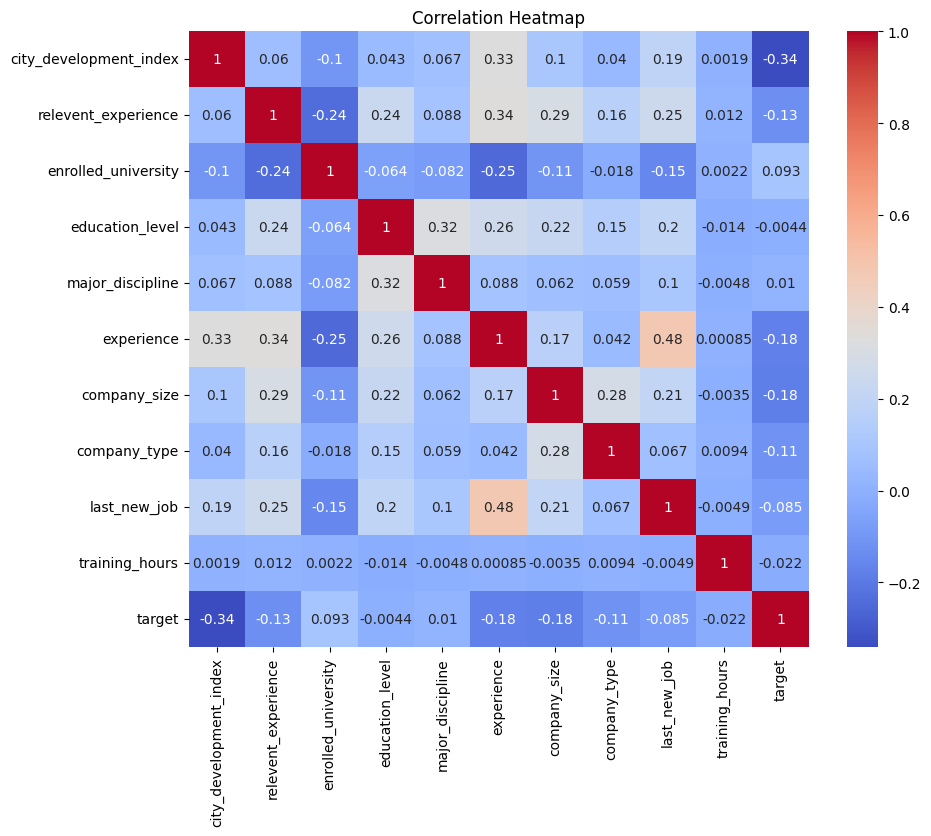

In [97]:
data=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

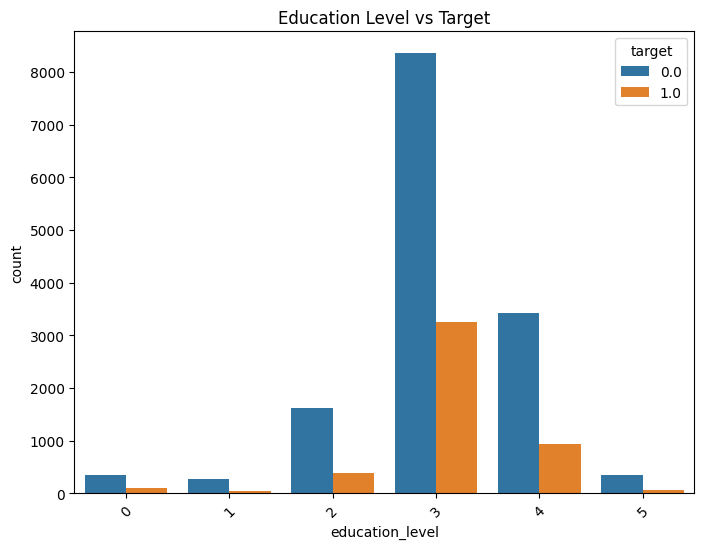

In [98]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='education_level', hue='target')
plt.title("Education Level vs Target")
plt.xticks(rotation=45)
plt.show()

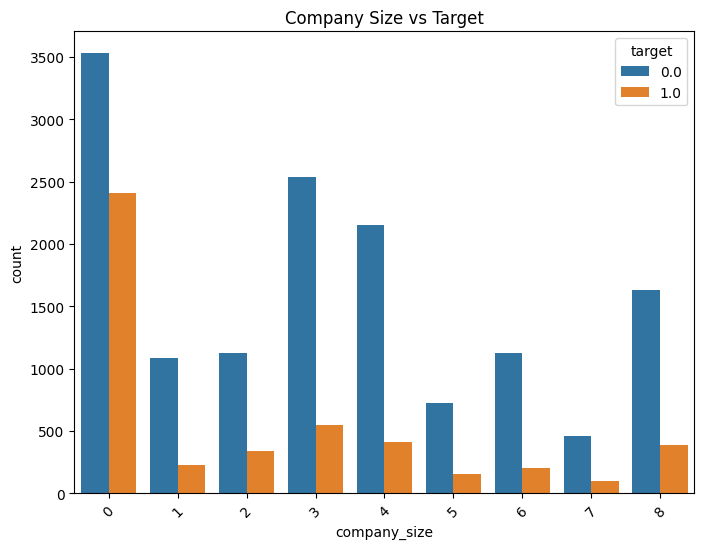

In [99]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='company_size', hue='target')
plt.title("Company Size vs Target")
plt.xticks(rotation=45)
plt.show()

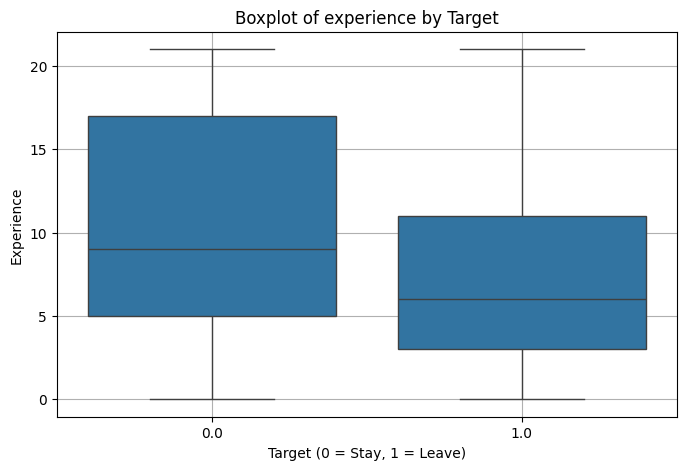

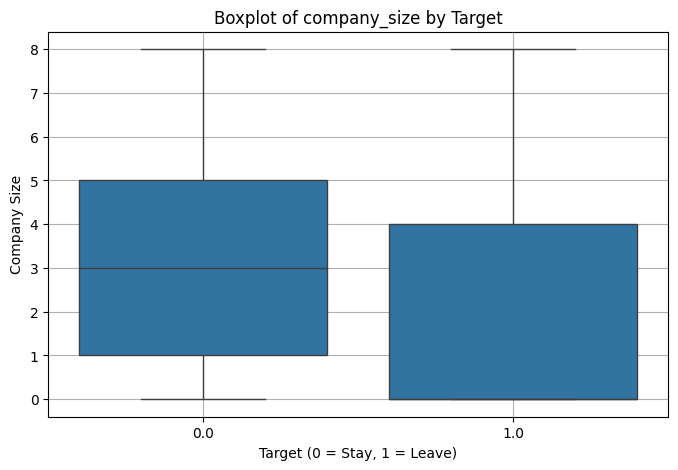

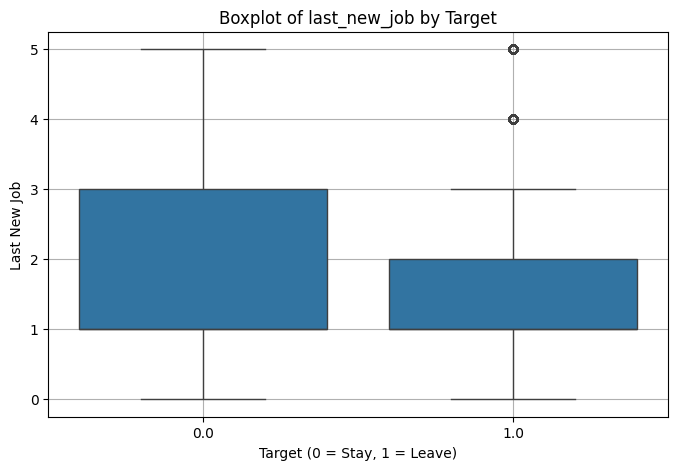

In [100]:
fet = ['experience', 'company_size', 'last_new_job']

for col in fet:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='target', y=col, data=train)
    plt.title(f'Boxplot of {col} by Target')
    plt.xlabel('Target (0 = Stay, 1 = Leave)')
    plt.ylabel(col.replace('_', ' ').title())
    plt.grid(True)
    plt.show()

# Feature selection

In [101]:
feature=['city_development_index', 'relevent_experience','education_level','enrolled_university', 'major_discipline','experience', 'company_size', 'company_type', 'last_new_job']

# Train-Test Split

In [102]:
X = train[feature]
y = train['target']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models

## Random Forest Classifier

In [104]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [105]:
y_pred_rf = rf.predict(X_test)

In [106]:
auc_score = roc_auc_score(y_test, y_pred_rf)
print(" Random Forest Report:")
print("AUC-ROC Score for random forest:", auc_score)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

 Random Forest Report:
AUC-ROC Score for random forest: 0.6864933473389356
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      2880
         1.0       0.55      0.51      0.53       952

    accuracy                           0.78      3832
   macro avg       0.70      0.69      0.69      3832
weighted avg       0.77      0.78      0.77      3832

Confusion Matrix:
 [[2490  390]
 [ 468  484]]


## Logistic Regression

In [107]:
lgr=LogisticRegression(class_weight='balanced', random_state=42)
lgr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [108]:
y_pred_lgr = lgr.predict(X_test)

In [109]:
auc_score_lgr = roc_auc_score(y_test, y_pred_lgr)
print("Logistic Regression Report:")
print("AUC-ROC Score for Logistic Regression:", auc_score_lgr)
print(classification_report(y_test, y_pred_lgr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgr))

Logistic Regression Report:
AUC-ROC Score for Logistic Regression: 0.7072114262371615
              precision    recall  f1-score   support

         0.0       0.88      0.73      0.79      2880
         1.0       0.45      0.69      0.55       952

    accuracy                           0.72      3832
   macro avg       0.66      0.71      0.67      3832
weighted avg       0.77      0.72      0.73      3832

Confusion Matrix:
 [[2089  791]
 [ 296  656]]


## XGBoost

In [110]:
xgb = XGBClassifier(scale_pos_weight=3, eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [111]:
y_pred_xgb = xgb.predict(X_test)

In [112]:
auc_score_xgb = roc_auc_score(y_test, y_pred_xgb)
print("XGBoost Report:")
print("AUC-ROC Score for XGBoost:", auc_score_xgb)
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Report:
AUC-ROC Score for XGBoost: 0.7491304855275444
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      2880
         1.0       0.53      0.71      0.60       952

    accuracy                           0.77      3832
   macro avg       0.71      0.75      0.72      3832
weighted avg       0.80      0.77      0.78      3832

Confusion Matrix:
 [[2276  604]
 [ 278  674]]


# Tune Hyperparameters

## Selecting parameters

In [113]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

## Grid Search

In [114]:
grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=3, scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [115]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

In [116]:
print(best_model)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2)


In [118]:
scores = cross_val_score(grid, X, y, cv=5, scoring='roc_auc')
print("Grid Search Report:")
print("Average AUC:", scores.mean())
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Grid Search Report:
Average AUC: 0.8030726996809676
              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85      2880
         1.0       0.56      0.72      0.63       952

    accuracy                           0.79      3832
   macro avg       0.73      0.77      0.74      3832
weighted avg       0.81      0.79      0.80      3832

Confusion Matrix:
 [[2340  540]
 [ 268  684]]


## Feature Importance for Tuned Random Forest

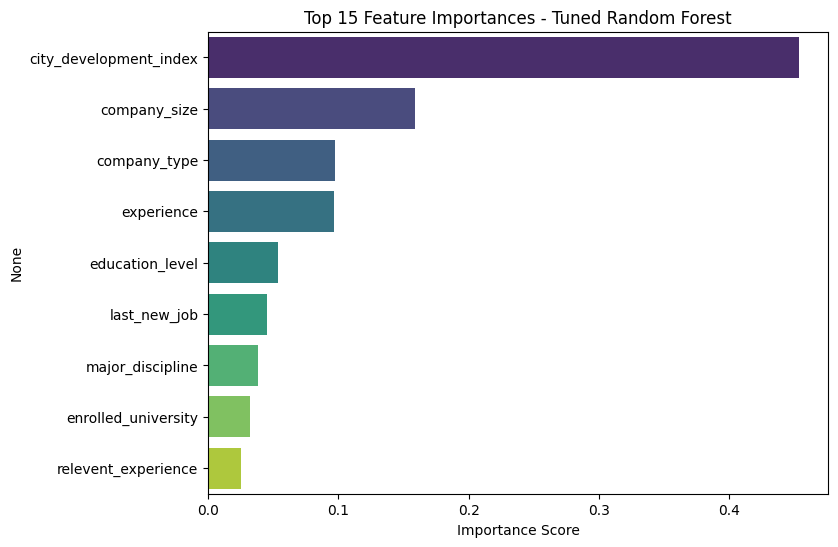

In [119]:
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title("Top 15 Feature Importances - Tuned Random Forest")
plt.xlabel("Importance Score")
plt.show()

# Creating a CSV file after processing test.csv with the mode

## Select the same features used during model training

In [120]:
ft=test[feature]

## Predict the target values for the test set

In [121]:
y_pred = grid.predict(ft)

## Create a submission DataFrame with enrollee IDs and predicted target values and saving result in csv file

In [122]:
submission = pd.DataFrame({
    'enrollee_id': df_test['enrollee_id'],
    '  ':'    ',
    'target': y_pred
})
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created.")

Submission file 'submission.csv' created.


# Scale features

In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

## Save Scaler and Model to .pkl

In [124]:
joblib.dump(scaler, "scaler.pkl")
joblib.dump(grid, "grid_model.pkl")

['grid_model.pkl']